In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fim import apriori

In [2]:
path = "../DataSet/"
df = pd.read_csv(path + 'Dataset_Final.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NotValid,TotalSatisfaction,ProbablyLeave
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,20,2.0,2,8.0,7,2,13,False,11,0
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,21,3.0,3,1.0,8,1,6,True,11,1
2,36.0,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,Male,...,7,4.0,3,1.0,5,1,2,False,13,0
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,12,1.0,3,3.0,7,0,7,False,9,1
4,37.0,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,2,3.0,3,10.0,2,2,1,True,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,38.0,No,Travel_Rarely,890,Sales,2,3,Marketing,4,Male,...,2,3.0,3,8.0,2,2,2,True,12,0
1466,44.0,No,Travel_Rarely,1111,Sales,8,2,Life Sciences,3,Male,...,6,5.0,3,4.0,2,1,2,False,9,0
1467,30.0,No,Travel_Rarely,163,Research & Development,24,1,Technical Degree,4,Male,...,9,3.0,2,1.0,4,1,4,False,15,0
1468,36.0,No,Travel_Frequently,457,Research & Development,26,2,Other,2,Male,...,4,3.0,2,8.0,2,1,3,True,9,1


## ---- Preprocessing dei dati
Applicazione dei Binning alle variabili continue

Dividere in 5 range MonthlyIncome: Very Low; Low; Medium; High; Very High

In [3]:
def toRange_MonthlyIncome(df):
    ll = df['MonthlyIncome'].values
    monthly_range = []
    for i in ll:
        if i < 5000:
            monthly_range.append("Very Low")
        elif i < 9000:
            monthly_range.append("Low")
        elif i < 13000:
            monthly_range.append("Medium")
        elif i < 17000:
            monthly_range.append("High")
        else:
            monthly_range.append("Very High")
    return monthly_range

In [4]:
df["MonthlyIncome_Range"] = toRange_MonthlyIncome(df)

Divido in 4 bin le variabili YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

In [5]:
def toRange_Years(df, years_toBin):
    dt = {}
    for i in years_toBin:
        ll = df[i].values
        dt[i+"_Range"]=[]
        for x in ll:
            if x <= 4:
                dt[i+"_Range"].append("<=4")
            elif x <= 8:
                dt[i+"_Range"].append(">4 <=8")
            elif x <= 12:
                dt[i+"_Range"].append(">8 <=12")
            else:
                dt[i+"_Range"].append(">12")
    return dt
        #df[i+"_Range"] = _range

In [6]:
years_toBin = ["YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]
ll = toRange_Years(df, years_toBin)
for i in years_toBin:
    df[i+"_Range"] = ll[i+"_Range"]

Divido in bin le features:
- DistanceFromHome
- Age
- PercentSalaryHike
- TotalWorkingYears
- TotalSatisfaction

In [7]:
df['DistanceFromHome_Range'] = pd.qcut(df['DistanceFromHome'], q=4, labels=['<=2', '>2 <=7', '>7 <=14', '>14'])
df['Age_Range'] = pd.qcut(df['Age'], q=4, labels=['<=31', '>31 <=37', '>37 <=42', '>42 <=60'])
df['PercentSalaryHike_Range'] = pd.qcut(df['PercentSalaryHike'], q=4, labels=['<=12', '>12 <=14', '>14 <=18', '>18'])
df['TotalWorkingYears_Range'] = pd.qcut(df['TotalWorkingYears'], q=4, labels=['<=6', '>6 <=10', '>10 <=15', '>15'])
df['TotalSatisfaction_Range'] = pd.qcut(df['TotalSatisfaction'], q=3, labels=['Low', 'Medium', 'High'])

Divido in 4 bin YearsAtCompany

In [8]:
ll = df["YearsAtCompany"].values
_range = []
for x in ll:
    if x <= 10:
        _range.append("<=10")
    elif x <= 20:
        _range.append(">10 <=20")
    elif x <= 30:
        _range.append(">20 <=30")
    else:
        _range.append(">30")
df["YearsAtCompany_Range"] = _range

Trasformazione delle stringhe binarie in parole diverse tra loro (per evitare confusioni)

In [9]:
df['Attrition'] = df['Attrition'].map(
    {"No": 'Not_Attrition', "Yes": 'Attrition'}).astype(str)
df['OverTime'] = df['OverTime'].map(
    {"No": 'Not_OverTime', "Yes": 'OverTime'}).astype(str)
df['NotValid'] = df['NotValid'].map(
    {False: 'Not_NotValid', True: 'NotValid'}).astype(str)

Drop delle colonne non utilizzate

In [10]:
df = df.drop(columns=["Age", "MonthlyIncome", "DistanceFromHome", "PercentSalaryHike", 
                      "TotalWorkingYears", "TotalSatisfaction", "YearsAtCompany",
                     "YearsInCurrentRole", "YearsSinceLastPromotion","YearsWithCurrManager"])

In [11]:
df = df.drop(columns = ["DailyRate", "EnvironmentSatisfaction", "RelationshipSatisfaction" ,"HourlyRate",
                           "JobSatisfaction", "MonthlyRate", "WorkLifeBalance", "JobInvolvement",
                            "ProbablyLeave", "NotValid"])

Trasformazione degli attributi numerici in "valoreattributo_Nome"

In [12]:
df['Age_Range'] = df['Age_Range'].astype(str) + '_Age'
df['MonthlyIncome_Range'] = df['MonthlyIncome_Range'].astype(str) + '_MonthlyIncome'
df['DistanceFromHome_Range'] = df['DistanceFromHome_Range'].astype(str) + '_DistanceFromHome'
df['PercentSalaryHike_Range'] = df['PercentSalaryHike_Range'].astype(str) + '_PercentSalaryHike'
df['TotalWorkingYears_Range'] = df['TotalWorkingYears_Range'].astype(str) + '_TotalWorkingYears'
df['TotalSatisfaction_Range'] = df['TotalSatisfaction_Range'].astype(str) + '_TotalSatisfaction'
#df['YearsAtCompany_Range'] = df['YearsAtCompany_Range'].astype(str) + '_YearsAtCompany'
#df['YearsInCurrentRole_Range'] = df['YearsInCurrentRole_Range'].astype(str) + '_YearsInCurrentRole'
#df['YearsSinceLastPromotion_Range'] = df['YearsSinceLastPromotion_Range'].astype(str) + '_YearsSinceLastPromotion'
#df['YearsWithCurrManager_Range'] = df['YearsWithCurrManager_Range'].astype(str) + '_YearsWithCurrManager'

In [13]:
df['Education'] = df['Education'].astype(str) + '_Education'
df['JobLevel'] = df['JobLevel'].astype(str) + '_JobLevel'
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].astype(str) + '_NumCompaniesWorked'
df['PerformanceRating'] = df['PerformanceRating'].astype(str) + '_PerformanceRating'
df['StockOptionLevel'] = df['StockOptionLevel'].astype(str) + '_StockOptionLevel'
df['TrainingTimesLastYear'] = df['TrainingTimesLastYear'].astype(str) + '_TrainingTimesLastYear'

In [14]:
df = df.drop(columns = ["YearsAtCompany_Range", "YearsSinceLastPromotion_Range", "YearsWithCurrManager_Range", "YearsInCurrentRole_Range"])

In [15]:
df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'StockOptionLevel', 'TrainingTimesLastYear', 'MonthlyIncome_Range',
       'DistanceFromHome_Range', 'Age_Range', 'PercentSalaryHike_Range',
       'TotalWorkingYears_Range', 'TotalSatisfaction_Range'],
      dtype='object')

## Trasformazione dataset in basket di transazioni

Trasformazione del dataset in un insieme di transazioni

In [16]:
baskets = df.values.tolist()

In [17]:
baskets

[['Not_Attrition',
  'Travel_Rarely',
  'Research & Development',
  '4_Education',
  'Medical',
  'Male',
  '3_JobLevel',
  'Research Director',
  'Single',
  '9_NumCompaniesWorked',
  'Not_OverTime',
  '3.0_PerformanceRating',
  '0_StockOptionLevel',
  '2.0_TrainingTimesLastYear',
  'Low_MonthlyIncome',
  '>7 <=14_DistanceFromHome',
  '>42 <=60_Age',
  '>14 <=18_PercentSalaryHike',
  '>15_TotalWorkingYears',
  'Medium_TotalSatisfaction'],
 ['Not_Attrition',
  'Travel_Rarely',
  'Research & Development',
  '1_Education',
  'Life Sciences',
  'Male',
  '5_JobLevel',
  'Manager',
  'Divorced',
  '1_NumCompaniesWorked',
  'OverTime',
  '3.0_PerformanceRating',
  '1_StockOptionLevel',
  '3.0_TrainingTimesLastYear',
  'Very Low_MonthlyIncome',
  '<=2_DistanceFromHome',
  '>31 <=37_Age',
  '>12 <=14_PercentSalaryHike',
  '>15_TotalWorkingYears',
  'Medium_TotalSatisfaction'],
 ['Not_Attrition',
  'Travel_Frequently',
  'Sales',
  '3_Education',
  'Life Sciences',
  'Male',
  '2_JobLevel',
  

Frequent patterns extraction with different values of support and different types

 Discussion of the most interesting frequent patterns and analyze how changes the number of patterns w.r.t. the min_sup parameter

Fare il plot tra minimum support e Frequent itemsets

In [219]:
support = [i for i in range(10, 60)]
type_apriori = {}
for ln in [2, 3, 4, 5]:
    type_apriori[ln] = {}
    for elem in ["a", "m", "c"]:
        itemset_ll = []
        for i in support:
            itemset = apriori(baskets, supp = i, zmin = ln, target = elem, report = "asS")
            itemset_ll.append(len(itemset))
        type_apriori[ln][elem] = itemset_ll

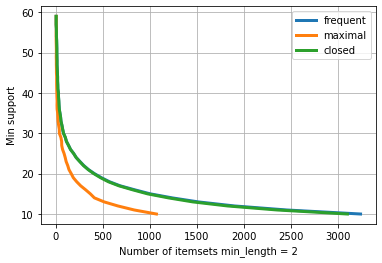

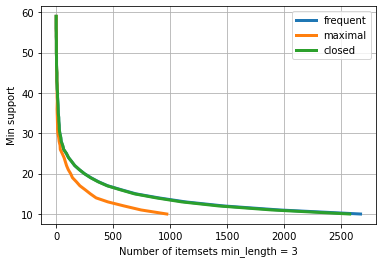

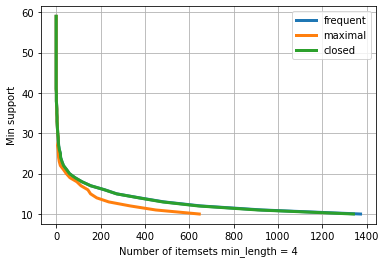

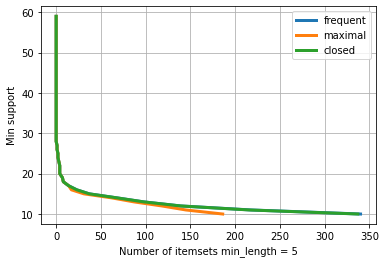

In [220]:
to_def = {"a": "frequent", "m": "maximal", "c": "closed"}
for i in [2, 3, 4, 5]:
    for el in ["a", "m", "c"]:
        tmp_len = type_apriori[i][el]
        plt.plot(tmp_len, support,label=to_def[el],lw=3)
    plt.xlabel("Number of itemsets min_length = " + str(i))#,fontsize=22)
    plt.ylabel("Min support")#,fontsize=22)
    plt.legend()
    plt.grid()
    plt.show()


Introduzione delle variabili d'errore nel dataset

In [18]:
err_df = pd.read_csv(path + 'Dataset_Final.csv')

In [19]:
yAtC = err_df["YearsAtCompany"]
tWY = err_df["TotalWorkingYears"]
age = err_df["Age"]
dt = {"IllegalWorking": [], "ChildWorking": [], "PreviousBirthWorking": []}
error = [0, 0, 0]
for i in range(0, len(yAtC)):
    error = [0, 0, 0]
    if yAtC[i] > tWY[i]:
        dt["IllegalWorking"].append("IllegalWorking")
        error[0] = 1
    if age[i] - tWY[i] <= 0:
        dt["PreviousBirthWorking"].append("PreviousBirthWorking")
        error[1] = 1
    if (age[i] - tWY[i] > 0) and (age[i] - tWY[i] < 16):
        dt["ChildWorking"].append("ChildWorking")
        error[2] = 1
    if error[0] == 0:
        dt["IllegalWorking"].append("Not_IllegalWorking")
    if error[1] == 0:
        dt["PreviousBirthWorking"].append("Not_PreviousBirthWorking")
    if error[2] == 0:
        dt["ChildWorking"].append("Not_ChildWorking")

In [20]:
new_df = df.copy()
new_df["IllegalWorking"] = dt["IllegalWorking"]
new_df["PreviousBirthWorking"] = dt["PreviousBirthWorking"]
new_df["ChildWorking"] = dt["ChildWorking"]

In [21]:
basket_err = new_df.values.tolist()

Estrazione delle regole

In [22]:
rule_err = apriori(basket_err, target = "a", supp = 10, zmin=4, report = "aS", mode = 'o')

In [23]:
print('Number of rule:', len(rule_err))

Number of rule: 11748


In [24]:
rule_err

[(('>10 <=15_TotalWorkingYears',
   'Not_IllegalWorking',
   'Not_Attrition',
   'Not_PreviousBirthWorking'),
  152,
  10.340136054421768),
 (('>10 <=15_TotalWorkingYears',
   'Not_IllegalWorking',
   'Not_ChildWorking',
   'Not_PreviousBirthWorking'),
  151,
  10.272108843537415),
 (('>10 <=15_TotalWorkingYears',
   'Not_IllegalWorking',
   '3.0_PerformanceRating',
   'Not_PreviousBirthWorking'),
  151,
  10.272108843537415),
 (('>10 <=15_TotalWorkingYears',
   'Not_Attrition',
   'Not_ChildWorking',
   'Not_PreviousBirthWorking'),
  148,
  10.068027210884352),
 (('0_NumCompaniesWorked',
   'Not_Attrition',
   'Not_ChildWorking',
   'Not_PreviousBirthWorking'),
  153,
  10.408163265306122),
 (('0_NumCompaniesWorked',
   'Not_Attrition',
   '3.0_PerformanceRating',
   'Not_PreviousBirthWorking'),
  150,
  10.204081632653061),
 (('0_NumCompaniesWorked',
   'Not_ChildWorking',
   '3.0_PerformanceRating',
   'Not_PreviousBirthWorking'),
  149,
  10.136054421768707),
 (('ChildWorking',
   

In [228]:
# Regole in Dataframe

In [229]:
df_rules_err = pd.DataFrame(rule_err,columns=["pattern","support_abs","support_perc"])

In [230]:
for i in df_rules_err.values:
    if("Not_IllegalWorking" not in i[0]):
        if("IllegalWorking" in i[0]):
            print("****** Pattern: ")
            print(i[0])
            print("****** Supporto: ")
            print(str(i[1]) + " - " + str(i[2]))
            print("____________________________")
            print("____________________________")
for i in df_rules_err.values:
    if("Not_PreviousBirthWorking" not in i[0]):
        if("PreviousBirthWorking" in i[0]):
            print("****** Pattern: ")
            print(i[0])
            print("****** Supporto: ")
            print(str(i[1]) + " - " + str(i[2]))
            print("____________________________")
            print("____________________________")
for i in df_rules_err.values:
    if("Not_ChildWorking" not in i[0]):
        if("ChildWorking" in i[0]):
            print("****** Pattern: ")
            print(i[0])
            print("****** Supporto: ")
            print(str(i[1]) + " - " + str(i[2]))
            print("____________________________")
            print("____________________________")

****** Pattern: 
('IllegalWorking', '<=6_TotalWorkingYears', 'Not_ChildWorking', 'Not_PreviousBirthWorking')
****** Supporto: 
269 - 18.299319727891156
____________________________
____________________________
****** Pattern: 
('IllegalWorking', '<=6_TotalWorkingYears', '1_NumCompaniesWorked', 'Not_ChildWorking', 'Not_PreviousBirthWorking')
****** Supporto: 
173 - 11.768707482993197
____________________________
____________________________
****** Pattern: 
('IllegalWorking', '<=6_TotalWorkingYears', '1_NumCompaniesWorked', 'Not_ChildWorking')
****** Supporto: 
173 - 11.768707482993197
____________________________
____________________________
****** Pattern: 
('IllegalWorking', '<=6_TotalWorkingYears', '1_NumCompaniesWorked', 'Not_PreviousBirthWorking')
****** Supporto: 
173 - 11.768707482993197
____________________________
____________________________
****** Pattern: 
('IllegalWorking', '<=6_TotalWorkingYears', '1_NumCompaniesWorked', '1_JobLevel', 'Not_ChildWorking', 'Not_PreviousBirt

In [265]:
baskets = df.values.tolist()

In [272]:
rules = apriori(baskets, target = "a", supp = 15, zmin=4, report = "aS", mode = 'o')
print('Number of rule:', len(rules))
df_rules = pd.DataFrame(rules,columns=["pattern","support_abs","support_perc"])

Number of rule: 82


In [273]:
for i in df_rules.values:
    print("****** Pattern: ")
    print(i[0])
    print("****** Supporto: ")
    print(str(i[1]) + " - " + str(i[2]))
    print("____________________________")
    print("____________________________")

****** Pattern: 
('Medical', 'Research & Development', 'Not_OverTime', 'Not_Attrition')
****** Supporto: 
232 - 15.782312925170066
____________________________
____________________________
****** Pattern: 
('Medical', 'Research & Development', 'Travel_Rarely', 'Not_Attrition')
****** Supporto: 
243 - 16.53061224489796
____________________________
____________________________
****** Pattern: 
('Single', 'Male', 'Not_Attrition', '0_StockOptionLevel')
****** Supporto: 
225 - 15.306122448979592
____________________________
____________________________
****** Pattern: 
('Single', 'Research & Development', 'Not_OverTime', '0_StockOptionLevel')
****** Supporto: 
225 - 15.306122448979592
____________________________
____________________________
****** Pattern: 
('Single', 'Research & Development', 'Not_Attrition', '0_StockOptionLevel')
****** Supporto: 
238 - 16.19047619047619
____________________________
____________________________
****** Pattern: 
('Single', 'Not_OverTime', 'Travel_Rarely',

## Estrazione delle regole in base al livello di confidenza

In [120]:
res = []
for support in range(5, 26):
    for confidence in range(40, 81):
        itemsets = apriori(baskets, supp=support, zmin=5, target='r', conf=confidence, report='aSCl', mode='o')
        for e in itemsets: 
            res.append({
                'support': e[3],
                'confidence': e[4],
                'lift': e[5]
            })

In [121]:
df_rules_conf = pd.DataFrame(res)

In [122]:
df_rules_conf = df_rules_conf[df_rules_conf["lift"]>1]
df_rules_conf

,support,confidence,lift
0,5.374150,86.813187,1.004846
1,5.374150,95.180723,1.134758
2,5.374150,75.238095,1.029795
3,5.374150,100.000000,1.529657
4,5.102041,88.235294,1.021306
...,...,...,...
1807253,27.551020,92.465753,1.102390
1807254,25.238095,86.682243,1.003330
1807255,25.238095,89.397590,1.065811
1807256,27.551020,87.473002,1.012483


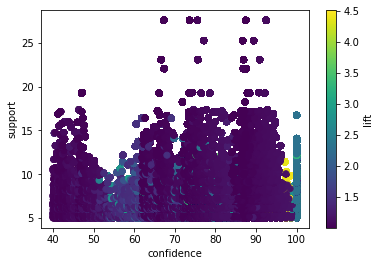

In [123]:
plt.scatter(df_rules_conf['confidence'], df_rules_conf['support'], c=df_rules_conf['lift'], cmap='viridis')
plt.xlabel("confidence")
plt.ylabel("support")
plt.colorbar(label="lift")
plt.show()

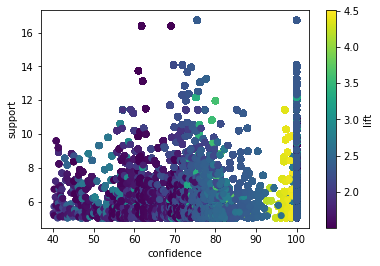

In [124]:
x = df_rules_conf[df_rules_conf["lift"]>1.5]
plt.scatter(x ['confidence'], x ['support'], c=x ['lift'], cmap='viridis')
plt.xlabel("confidence")
plt.ylabel("support")
plt.colorbar(label="lift")
plt.show()

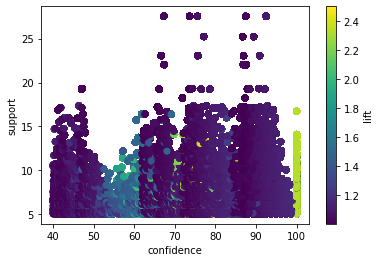

In [119]:
df_rules_conf = df_rules_conf[df_rules_conf["lift"]<2.5]
plt.scatter(df_rules_conf['confidence'], df_rules_conf['support'], c=df_rules_conf['lift'], cmap='viridis')
plt.xlabel("confidence")
plt.ylabel("support")
plt.colorbar(label="lift")
plt.show()

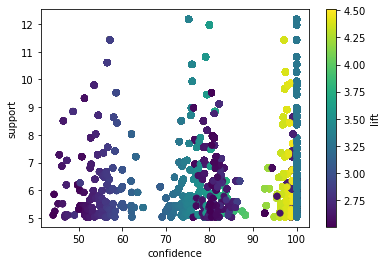

In [55]:
df_rules_conf = df_rules_conf[df_rules_conf["lift"]>2.5]
plt.scatter(df_rules_conf['confidence'], df_rules_conf['support'], c=df_rules_conf['lift'], cmap='viridis')
plt.xlabel("confidence")
plt.ylabel("support")
plt.colorbar(label="lift")
plt.show()

In [116]:
min_sup = {}
confidence_ll = [i for i in range(1, 100)]
support_ll = [10, 15, 20]
for support in support_ll:
    rules_ll = []
    for confidence in confidence_ll:
        rules = apriori(baskets, supp = support, zmin = 5, target = "r", conf=confidence, report='aSCl', mode='o')
        rules_ll.append(len(rules))
    min_sup[str(support)] = rules_ll

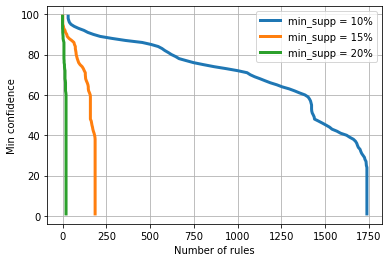

In [117]:
to_def = {"10": "min_supp = 10%", "15": "min_supp = 15%", "20": "min_supp = 20%"}
for support in support_ll:
    tmp_len = min_sup[str(support)]
    plt.plot(tmp_len, confidence_ll,label=to_def[str(support)],lw=3)
plt.xlabel("Number of rules")#,fontsize=22)
plt.ylabel("Min confidence")#,fontsize=22)
plt.legend()
plt.grid()
plt.show()

In [97]:
def extractRules(baskets, support, confidence):
    rules = apriori(baskets, supp=support, zmin=5, target='r', conf=confidence, report='aSCl', mode='o')
    df_rules_conf = pd.DataFrame(rules, columns=["conseq","antecedent","support_abs","support_perc","confidence","lift"])
    
    print("*** Numero di regole con:")
    print("- Lift > 1:", len(df_rules_conf[df_rules_conf["lift"]>1]))
    print("- Lift = 1:",len(df_rules_conf[df_rules_conf["lift"]==1]))
    print("- Lift < 1:", len(df_rules_conf[df_rules_conf["lift"]<1]))

    #fig = plt.figure(figsize= (25,10))

    plt.hist(df_rules_conf["lift"])
    plt.xlabel('lift')
    
    plt.show()
    
    plt.hist(df_rules_conf["confidence"])
    plt.xlabel('confidence')
    
    return df_rules_conf

*** Numero di regole con:
- Lift > 1: 510
- Lift = 1: 0
- Lift < 1: 112


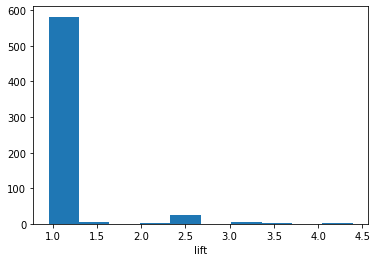

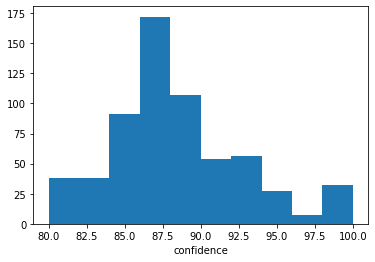

In [135]:
x = extractRules(baskets, 10, 70)

In [136]:
for i in x.values:
    if(i[5] > 1):
        print("****** Regola:")
        print(str(i[1]) + " => "+str(i[0]))
        print("**** Support: " + str(i[3]) + " Confidence: "+ str(i[4]) + " Lift: " + str(i[5]))

****** Antecedente:
('Research Scientist', '1_JobLevel', 'Research & Development', 'Travel_Rarely') => 3.0_PerformanceRating
**** Support: 10.612244897959183 Confidence: 88.63636363636364 Lift: 1.025948460987831
****** Antecedente:
('Research Scientist', '1_JobLevel', 'Travel_Rarely', '3.0_PerformanceRating') => Research & Development
**** Support: 10.612244897959183 Confidence: 100.0 Lift: 1.5296566077003122
****** Antecedente:
('Research Scientist', 'Research & Development', 'Travel_Rarely', '3.0_PerformanceRating') => 1_JobLevel
**** Support: 10.612244897959183 Confidence: 81.25 Lift: 2.199585635359116
****** Antecedente:
('Research Scientist', '1_JobLevel', 'Research & Development', 'Not_Attrition') => 3.0_PerformanceRating
**** Support: 11.428571428571429 Confidence: 88.88888888888889 Lift: 1.0288713910761156
****** Antecedente:
('Research Scientist', '1_JobLevel', 'Not_Attrition', '3.0_PerformanceRating') => Research & Development
**** Support: 11.428571428571429 Confidence: 100.